In [9]:
from comer.datamodule import vocab
from comer.lit_comer import LitCoMER
from torchvision.transforms import ToTensor
import torch
from PIL import Image
from IPython.display import display

In [323]:
ckpt = '../lightning_logs/version_1/checkpoints/epoch=165-step=249165-val_ExpRate=0.6416.ckpt'
# ckpt = '../lightning_logs/version_0/checkpoints/epoch=151-step=57151-val_ExpRate=0.6365.ckpt'

In [324]:
model = LitCoMER.load_from_checkpoint(ckpt)
model = model.eval()
device = torch.device("cpu")
model = model.to(device)

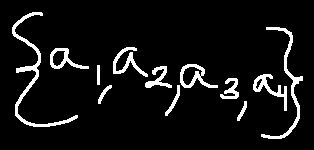

In [325]:
# img_path = 'UN19_1019_em_267.bmp'
# img_path = 'UN19_1041_em_595.bmp'
img_path = 'RIT_2014_242.bmp'
img = Image.open(img_path)
display(img)

In [326]:
# import cv2 as cv
# import numpy as np
# img = cv.imread(img_path,0)
# # img3 = cv.imread(img_path_2,0)
# kernel = np.ones((3,3),np.uint8)
# erosion = cv.erode(img,kernel,iterations = 1)
# # erosion2 = cv.erode(img3,kernel,iterations = 1)
# # print(type(erosion))
# # Image.open(img)
# Image.fromarray(erosion)

In [327]:
# img = ToTensor()(erosion)
img = ToTensor()(img)
mask = torch.zeros_like(img, dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)
print(pred_latex)

3 a _ { 1 } a _ { 1 } a _ { 2 } a _ { 3 } a _ { 4 } z


In [5]:
img = ToTensor()(img)
mask = torch.zeros_like(img, dtype=torch.bool)
hyp = model.approximate_joint_search(img.unsqueeze(0), mask)[0]
pred_latex = vocab.indices2label(hyp.seq)

In [6]:
print(pred_latex)

\frac { 6 } { \sqrt { 3 6 0 } }
